# Data Structures and Processing

## Week3: NumPy, and Matplotlib

In [12]:
import numpy as np
from typing import Union

In [13]:
np.array([1., 30])

array([ 1., 30.])

import matplotlib

### Task 1: Custom NumPy Functions

Write down a function `heaviside` which takes a number (`int` or `float`) and returns 1 if it is positive, 0 otherwise.

In [6]:
def heaviside(num: Union[int, float]):
    if(num > 0):
        return 1
    return 0
    

In [14]:
assert heaviside(0.1) == 1
assert heaviside(-0.1) == 0
assert heaviside(0) == 0
assert heaviside(4) == 1

At this point, your function `heaviside` will return a `ValueError` if a NumPy array is provided as an input to it.  We would like to extend this function so that it handles any `ndarray` whose dtype is `int` or `float`.

Extend the `heaviside` function to handle the `ndarray`.

In [34]:
# Your solution to extend the heaviside function to handle `ndarray` goes here.
def heaviside(num: Union[int, float, np.ndarray]):
    if isinstance(num, (int, float)):
        if(num > 0):
            return 1
        return 0
    else:
        for i in range(len(num)):
            if(num[i] > 0):
                num[i] = 1
            else:
                num[i] = 0
        return num
    
print(heaviside(np.array([1,-2,3])))

[1 0 1]


In [35]:
assert np.all(heaviside(np.array([-1.2, 0.2, 3])) == np.array([0, 1, 1]))

### Task 2: Aggregate Functions

There are a lot of aggregate functions available in NumPy. Some of the variable useful ones include: `np.sum`, `np.mean`, `np.std`, `np.max`, `np.min` and so on.  For a detailed explanation of the parameters these function take in, have a look at their documentation using `help`.

Write down a function `mean_squared_values` that takes an `ndarray` as an argument and returns the mean value of the squares of elements in it.

In [24]:
def mean_squared_values(arr: np.ndarray):
    squared_val = np.square(arr)
    mean_squared = np.mean(squared_val)
    return mean_squared
    

In [36]:
import numpy as np
x_utest = np.arange(10)
print(x_utest)
print(mean_squared_values(x_utest))
assert mean_squared_values(x_utest) == 28.5

[0 1 2 3 4 5 6 7 8 9]
28.5


### Task 3: I/O and Visualization

In this task, we plan to read a data to an `ndarray`, process it, visualize the processed data, and write down to a file.

#### Step 1: Reading Data From a File

Consider the file `data.txt` in the current directory, and read its content to an array named `arr`.

Write down a function `read_values` that takes a `CSV` file `filename` as an input and an `index` as a second argument, and returns the `index` column from the `CSV` file as a NumPy array. You can use either `np.loadtxt` or `pandas.read_csv` here.

In [55]:
def read_values(filename: str, index: int):
    data = np.loadtxt(filename,delimiter=",",dtype=float) 
    column = data[:,index]
    return column

In [56]:

first_five = np.array([-1.9142, -1.8918, -1.3978, -1.382, -1.2789])
assert np.allclose(read_values("data.txt", 0)[:5], first_five)

Use your function to read in values to two variables `x_values` and `y_values`.

In [51]:
x_values = read_values("data.txt",0)
y_values = read_values("data.txt",1)

In [52]:
first_five_x = np.array([-1.9142, -1.8918, -1.3978, -1.382, -1.2789])
first_five_y = np.array([-0.7919, -0.0492, -1.5441, -0.087, -1.3767])
assert np.allclose(x_values[:5], first_five_x)
assert np.allclose(y_values[:5], first_five_y)

### Step 2: Processing

At this point, we are choosing a simple only to demonstrate the processing before plotting.  The data read in does not reveal something useful because it is randomly generated.

The reader should see that any type of processing is possible at this step.

Let us say that we do not want to change the variable `x_values`, but we do want to process the `y_values` by applying an exponential function `np.exp` from the NumPy library.

In [57]:
y_values = np.exp(read_values("data.txt",1))

In [58]:
first_five_y = np.array([-0.7919, -0.0492, -1.5441, -0.087, -1.3767])
assert np.allclose(y_values[:5], np.exp(first_five_y))

#### Step 3: Visualization

Take the `x_values` and `y_values` and plot them using `plt.plot`.  Given extra directive of `"bo"` to the plot command.

In [60]:
import matplotlib.pyplot as plt

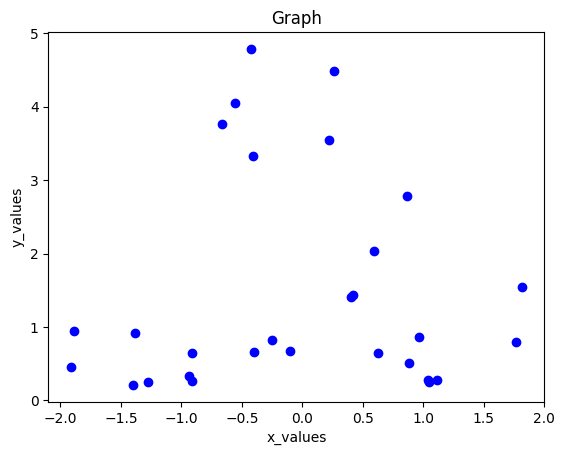

In [64]:
plt.plot(x_values,y_values,"bo")
plt.xlabel("x_values")
plt.ylabel("y_values")
plt.title("Graph")
plt.show()

#### Step 4: Writing Data to File

Write down a function `data_to_csv` that takes three arguments: `x_values`, `y_values` and `filename`, and writes down the arrays as a CSV file to `filename`.  The delimiter is `","`. You should use either `np.savetxt` of `DataFrame.to_csv` here.

In [67]:
# Your solution to 
def data_to_csv(x_values: np.ndarray, y_values: np.ndarray, filename: str):
    data = np.column_stack((x_values,y_values))
    np.savetxt(filename,data,delimiter=",")

In [68]:
data_to_csv(x_values, y_values, 'new_filename.txt')